In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# DATA IMPORTING

In [2]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# DATA INFORMATION

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# null value checking

In [4]:
df.isnull().any().any()

False

In [5]:
df.isnull().sum().sum()

0

# CORRELATION

In [6]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


# EDA

<AxesSubplot:>

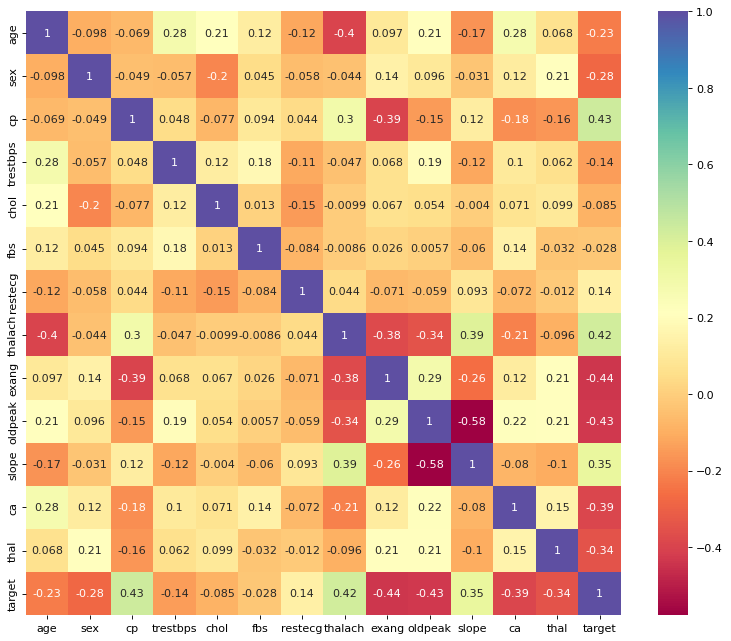

In [7]:
import seaborn as sns
from matplotlib.pyplot import figure
figure(figsize=(12, 10), dpi=80)
sns.heatmap(df.corr(), annot = True, fmt='.2g',cmap= 'Spectral')

# visualization

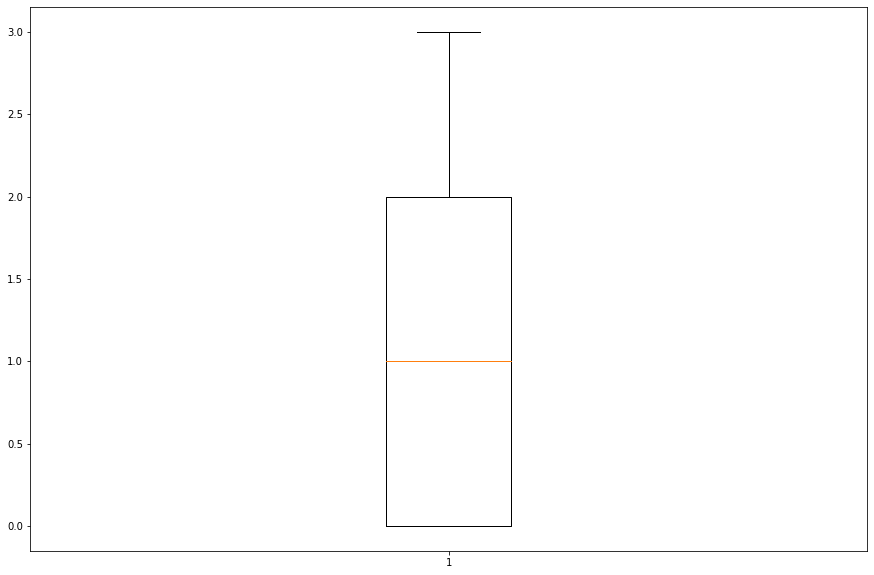

In [8]:
import matplotlib.pyplot as plt
np.random.seed(20)
box = df['cp']
fig = plt.figure(figsize =(15, 10))
plt.boxplot(box)
plt.show()

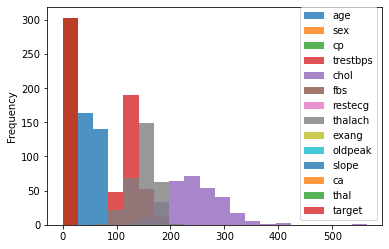

In [9]:
hist_graph=df.plot.hist(bins=20,alpha=0.8)
hist_graph;

C:\Users\91700\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


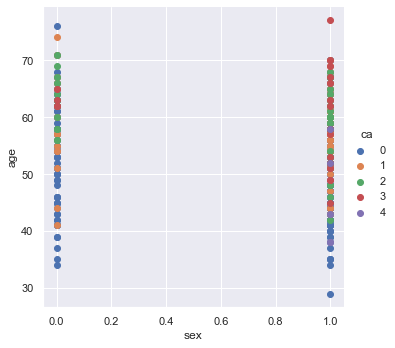

In [10]:
import seaborn as sns
sns.set()
sns.FacetGrid(df,hue="ca",size=5) \
.map(plt.scatter,"sex","age") \
.add_legend()
plt.show() 

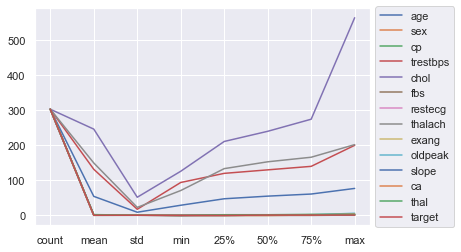

In [11]:
df.describe().plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))

# df classfication

In [12]:
x=df.drop('target',axis=1)
y=df[['target']]

# splitting train and test

In [13]:
# df splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# MODELS / ALGORITHMS IMPORTING

In [14]:
pip install xgboost

In [15]:
 import xgboost

In [16]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [17]:
import mlxtend

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from mlxtend.classifier import StackingCVClassifier

# LogisticRegression

In [19]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\91700\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\91700\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
predict_lr = lr.predict(x_test)
accuracy_score(y_test,predict_lr)

0.8

In [21]:
print(classification_report(y_test, predict_lr))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77        42
           1       0.84      0.81      0.82        58

    accuracy                           0.80       100
   macro avg       0.79      0.80      0.80       100
weighted avg       0.80      0.80      0.80       100



In [22]:
confusion_matrix(y_test, predict_lr)

array([[33,  9],
       [11, 47]], dtype=int64)

# Naive bayes

In [23]:
nb = GaussianNB()
nb.fit(x_train,y_train)

C:\Users\91700\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [24]:
predict_nb = nb.predict(x_test)
accuracy_score(y_test,predict_nb)

0.83

In [25]:
print(classification_report(y_test, predict_nb))

              precision    recall  f1-score   support

           0       0.76      0.88      0.81        42
           1       0.90      0.79      0.84        58

    accuracy                           0.83       100
   macro avg       0.83      0.84      0.83       100
weighted avg       0.84      0.83      0.83       100



In [26]:
confusion_matrix(y_test, predict_nb)

array([[37,  5],
       [12, 46]], dtype=int64)

# Random Forest Classifier

In [27]:
rfc = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rfc.fit(x_train,y_train)

C:\Users\91700\AppData\Local\Temp/ipykernel_20488/5981103.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train,y_train)


RandomForestClassifier(max_depth=5, n_estimators=20, random_state=12)

In [28]:
predict_rfc = rfc.predict(x_test)
accuracy_score(y_test,predict_rfc)

0.83

In [29]:
print(classification_report(y_test, predict_rfc))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80        42
           1       0.85      0.86      0.85        58

    accuracy                           0.83       100
   macro avg       0.83      0.82      0.82       100
weighted avg       0.83      0.83      0.83       100



In [30]:
confusion_matrix(y_test, predict_rfc)

array([[33,  9],
       [ 8, 50]], dtype=int64)

# X G BOOST

In [31]:
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='dart', callbacks=None,
              colsample_bylevel=0.6, colsample_bynode=0.5, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.6, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=15, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=25, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=27, ...)

In [32]:
predict_xgb = xgb.predict(x_test)
accuracy_score(y_test,predict_xgb)

0.84

In [33]:
print(classification_report(y_test, predict_xgb))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        42
           1       0.89      0.83      0.86        58

    accuracy                           0.84       100
   macro avg       0.84      0.84      0.84       100
weighted avg       0.84      0.84      0.84       100



In [34]:
confusion_matrix(y_test, predict_xgb)

array([[36,  6],
       [10, 48]], dtype=int64)

# KNeighbors Classifier

In [35]:
knc = KNeighborsClassifier(n_neighbors=10)
knc.fit(x_train,y_train)

C:\Users\91700\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=10)

In [36]:
predict_knc = knc.predict(x_test)
accuracy_score(y_test,predict_lr)

0.8

In [37]:
print(classification_report(y_test, predict_knc))

              precision    recall  f1-score   support

           0       0.59      0.69      0.64        42
           1       0.75      0.66      0.70        58

    accuracy                           0.67       100
   macro avg       0.67      0.67      0.67       100
weighted avg       0.68      0.67      0.67       100



In [38]:
confusion_matrix(y_test, predict_knc)

array([[29, 13],
       [20, 38]], dtype=int64)

# ROC CURVE

In [39]:
from sklearn.metrics import roc_curve

In [40]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,predict_lr)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,predict_nb)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,predict_rfc)                                                             
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,predict_xgb)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,predict_knc)

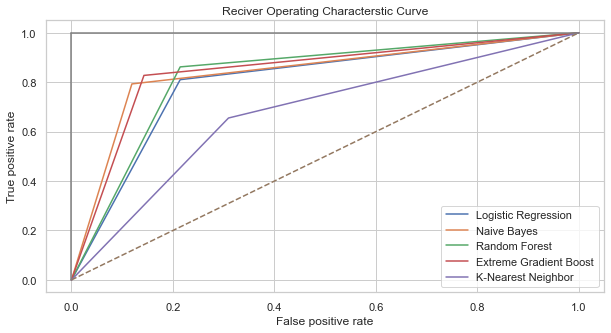

In [41]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

# ACCURACY SCORES OF ALL ALGORITHMS

In [42]:
rfc=accuracy_score(y_test,predict_rfc)
lr=accuracy_score(y_test,predict_lr)
xgb=accuracy_score(y_test,predict_xgb)
nb=accuracy_score(y_test,predict_nb)
knc=accuracy_score(y_test,predict_knc)

In [43]:
algo_accuracy = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour'], 'Accuracy': [rfc*100,
                    lr*100,xgb*100,nb*100,knc*100]})
algo_accuracy

,Model,Accuracy
0,Logistic Regression,83.0
1,Naive Bayes,80.0
2,Random Forest,84.0
3,Extreme Gradient Boost,83.0
4,K-Nearest Neighbour,67.0
